In [1]:
###DVR functions
#define a grid, calculate the wave function using the exact solution on the grid, create V, create T, diagonalize
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

def pot_1d_well(x):
    V=0
    if(x>1):
        V+=100000   
    if(x<0):
        V+=100000
    return V

def pot_harm_osz(x,k,x0):
    return 0.5*k* (x-x0)**2

def pot_double_well(x, labda=2,g=1/50):
    return -(1/4) * labda**2 * x**2 +g*x**4 + labda**4 / (64 *g)

def kin_inf(grid,hbar=1,m=1):#(-inf,inf) intervall
    N_grid=len(grid)
    T = np.zeros((N_grid,N_grid)) 
    for k in range(N_grid):
        for l in range(N_grid):
            if(k==l):
                T[k,k]= np.pi**2 /3
            if(k!=l):
                T[k,l]= (-1)**(k-l) *2/((k-l)**2)
    T *= hbar**2 / (2*m* (grid[2]-grid[1])**2 )
    return T

def pot(grid, potential):#input: grid and generic potential
    N_grid=len(grid)
    V = np.zeros((N_grid,N_grid)) 
    for k in range(N_grid):
        V[k,k]= potential(grid[k])
    return V


In [2]:
###exact PiB
from scipy.integrate import quad

def E_n_PiB(n): 
    return (n*np.pi)**2
    
def E_nm_PiB(n,m): 
    return (n**2-m**2)*(np.pi**2)

def psi_n_PiB(x,n):
    return np.sqrt(2)*np.sin(np.pi*n*x)

def psi_n_PiB(x,n):
    f=np.sqrt(2)*np.sin(np.pi*n*x)
    if(x>1 or x<0):
        f=0
    return f
def plot_psi_n_and_square_PiB(n,grid):
    psi = np.zeros(len(grid))
    psi_sq = np.zeros_like(psi)
    for k in range(len(grid)):
        psi[k]=psi_n_PiB(grid[k],n)
        psi_sq[k]=psi[k]**2
    plt.plot(grid,psi, label = "psi")
    plt.plot(grid,psi_sq, label = "psi **2")
    plt.ylabel('amplitude')
    plt.xlabel('x')
    #plt.legend()
    plt.show()

###if wavefkt is known 
def integrand_x(x,n,m,psi_n): 
    return psi_n(x,n)*psi_n(x,m)*x #since real

def x_nm_know_wavefkt(n,m):#we assume domain given by 0,1
    I,err= quad(integrand_x,0,1,args=(n,m) )
    return I


0.7071067811865476 0.7071067812526912 0 -6.614364611579049e-11
2.121320343559643 2.121320346967708 1 -3.4080653854573484e-09
3.5355339059327378 3.535533985516338 2 -7.958360015436483e-08
4.949747468305833 4.949748649324871 3 -1.1810190381211783e-06
6.3639610306789285 6.363973519252512 4 -1.2488573583269158e-05
7.778174593052023 7.778274458716942 5 -9.986566491893001e-05
9.19238815542512 9.193013164446468 6 -0.0006250090213484327
10.606601717798213 10.60972523907372 7 -0.0031235212755067465
12.020815280171309 12.033426752846275 8 -0.01261147267496554
13.435028842544403 13.476530124083796 9 -0.04150128153939292
14.849242404917499 14.961871397529334 10 -0.11262899261183534
16.263455967290593 16.520290978730095 11 -0.2568350114395024
17.67766952966369 18.18233411355664 12 -0.50466458389295
19.091883092036785 19.970431995228168 13 -0.8785489031913833
20.50609665440988 21.896972224313203 14 -1.3908755699033222
21.920310216782976 23.96699421851996 15 -2.0466840017369847
23.33452377915607 26.1

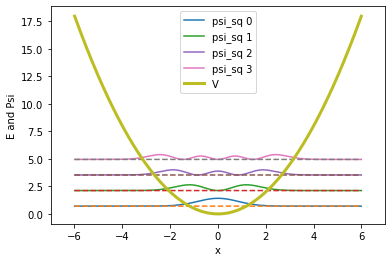

In [665]:
###Checked: Harmonic Oscillator
if(False):
    for k in range(20):
        E=hbar *np.sqrt(spring/m)*(k+0.5)
        print(E,w[k],k, E-w[k])
###plot wavefkt
if(False):
    N=len(grid)
    HO_pot = np.zeros(N)
    for k in range(N):
        HO_pot[k]= pot_harm_osz(grid[k],k=spring,x0=0)
    for n in range(4):
        #plt.plot(grid,v[:,n]*10+w[n], label = "psi %i" % n)#*10 s.t visible (b.c. it is normalized anyways)
        plt.plot(grid,v[:,n]**2 *200+w[n], label = "psi_sq %i" % n)#*10 s.t visible (b.c. it is normalized anyways)
        plt.plot(grid,np.zeros_like(v[:,n])*10+w[n],'--')#*10 s.t visible (b.c. it is normalized anyways)
    plt.plot(grid,HO_pot,label= "V",linewidth=3 )
    plt.ylabel('E and Psi')
    plt.xlabel('x')
    #plt.ylim([0,w[9]])
    plt.xlim([-7,7])
    plt.legend()
    plt.show()


In [2]:
###Checking: Double Well....#strongly dependent on given conditions, plotting is adviced
if(False):
    hbar=1 #like in OTOC paper
    m=1/2 #like in OTOC paper
    grid = np.linspace(-7,7,2000,endpoint=False)[1:] #in principle: gridspacing one to 5 grid points per de broglie wavelength and where one expects wavefkt to still be
    H=pot(grid=grid, potential=lambda x : pot_double_well(x=x,labda= 2, g=1/50))+kin_inf(grid=grid,hbar=hbar,m=m)
    w,v = LA.eigh(H)

    for k in range(10):
        print(w[k],k)
    for k in range(10):
        print(w[k+1]-w[k],k+1,'->',k)
###plot wavefkt
if(False):
    N=len(grid)
    DW_pot = np.zeros(N)
    for k in range(N):
        DW_pot[k]= pot_double_well(grid[k],labda=2, g=1/50)
    for n in range(13):
        plt.plot(grid,v[:,n]*20+w[n], label = "psi %i" % n)#*10 s.t visible (b.c. it is normalized anyways)
        #plt.plot(grid,v[:,n]**2 *1600+w[n], label = "psi_sq %i" % n)#*10 s.t visible (b.c. it is normalized anyways)
        plt.plot(grid,np.zeros_like(v[:,n])+w[n],'--')#*10 s.t visible (b.c. it is normalized anyways)
    plt.plot(grid,DW_pot,label= "V",linewidth=3 )
    plt.ylabel('E and Psi')
    plt.xlabel('x')
    #plt.ylim([0,w[20]])
    plt.xlim([-8,8])
    #plt.legend()
    plt.show()


9.869604401089358 9.287003411458622 0
39.47841760435743 37.14802433142512 1
88.82643960980423 83.58336539428754 2
157.91367041742973 148.59298954033358 3
246.74011002723395 232.17787872686702 4


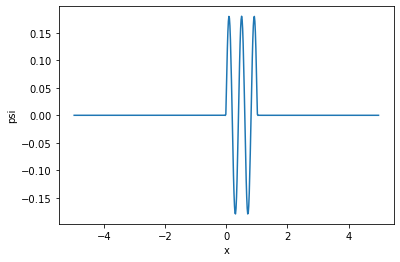

In [402]:
###checked for Particle in a box
if(False):
    for k in range(5):
        print(E_n(k+1),w[k],k)#paricle in a box
###plot wavefkt
if(False):
    n=4
    plt.plot(grid,v[:,n], label = "psi")
    psi = np.zeros(len(grid))
    psi_sq = np.zeros_like(psi)
    for k in range(len(grid)):
        psi[k]=psi_n_bound(grid[k],n)
        psi_sq[k]=psi[k]**2
    #plt.plot(grid,psi, label = "psi")
    #plt.plot(grid,psi_sq, label = "psi **2")
    plt.ylabel('psi')
    plt.xlabel('x')
    #plt.legend()
    plt.show()


In [3]:
###DVR 

#parameters
hbar=1 #like in OTOC paper
m=1/2 #like in OTOC paper
L=1
spring=1
grid = np.linspace(-8,8,5000,endpoint=False)[1:] #in principle: gridspacing one to 5 grid points per de broglie wavelength and where one expects wavefkt to still be

H=pot(grid=grid, potential=pot_1d_well)+kin_inf(grid=grid,hbar=hbar,m=m)
#H=pot(grid=grid, potential=lambda x : pot_harm_osz(x=x,k=spring,x0=0))+kin_inf(grid=grid,hbar=hbar,m=m)
###Double Well
grid = np.linspace(-7,7,5000,endpoint=False)[1:] #in principle: gridspacing one to 5 grid points per de broglie wavelength and where one expects wavefkt to still be
H=pot(grid=grid, potential=lambda x : pot_double_well(x=x,labda= 2, g=1/50))+kin_inf(grid=grid,hbar=hbar,m=m)

w,v = LA.eigh(H)

In [4]:
import numpy as np
    
def E_n_DVR(n,w=w):
    return w[n]

def E_nm_DVR(n,m, w=w):
    return E_n_DVR(n,w=w)-E_n_DVR(m,w=w)

def x_nm_from_DVR(v,n,m):
    return np.sum(v[:,n]*v[:,m]*grid)

def b_nm(t,n,m,X,E_nm_fk=E_nm_DVR): 
    I=0
    for k in range(len(X[:,1])):
        I+=X[n,k]*X[k,m]*(E_nm_fk(k,m)*np.exp(E_nm_fk(n,k)*1j*t)-E_nm_fk(n,k)*np.exp(E_nm_fk(k,m)*1j*t))
    return 0.5*I

def c_n(t,n,X,E_nm_fk=E_nm_DVR): #microcanonical OTOC
    I=0
    for m in range(len(X[:,1])):
        I += np.abs(b_nm(t,n,m,X,E_nm_fk))**2
        #if(n==13 or n==14):
        #    print(np.abs(b_nm(t,n,m,X,E_nm_fk))**2,n)
    return I


def C_T(C,beta=1,E_n_fk=E_n_DVR): #C is microcanonical OTOC
    Z=0 
    sum=np.zeros_like(C[:,1])#get Thermal OTOC for each time t
    for n in range(len(C[1,:])):
        Z+=np.exp(-beta *E_n_fk(n)) #partition sum
    for n in range(len(C[1,:])):
        for time in range(len(C[:,1])):
            sum[time] += np.exp(-beta *E_n_fk(n))*C[time,n] #wights of all microcanonical OTOCS
    return sum/Z

In [40]:
x_range=40
X=np.zeros((x_range,x_range))
for n in range(x_range):
    for m in range(x_range):
        ###DVR
        X[n,m]=x_nm_from_DVR(v=v,n=n,m=m)

In [41]:
#t=np.linspace(0,0.7,300) #good range for PiB
#t=np.linspace(0,20,3000)# HO
t=np.linspace(0,4,600)# DW
C = np.zeros((len(t),x_range))
for k in range(len(t)):
    for n in range(x_range):
        C[k,n] = c_n(t[k],n, X,E_nm_fk=E_nm_DVR) 
        #if(k==1):
        #  print(c_n(t[k],n, X,E_nm_fk=E_nm_DVR),n)
C=C[:,:-1] #because energy difference is wrong for the last one, I think because we don't have the last energy!

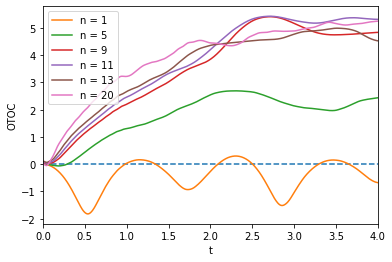

In [47]:
if(True):###plot microcanonical OTOC
    import matplotlib.pyplot as plt
    from matplotlib.ticker import ScalarFormatter
    fig, ax = plt.subplots()
    ax.plot(t,np.zeros_like(C[:,2]), '--')
    for n in (1,5,9,11,13,20):#DW OTOC from Paper (in paper:20)
        ax.plot(t,np.log(C[:,n]), label = "n = %i" %n)
    ax.set_ylabel('OTOC')
    #ax.set_yscale('log') #PiB #DW
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.set_xlabel('t')
    ax.set_xlim([0,4])# [0,4]..DW OTOC Paper
    ax.legend()
    plt.show()


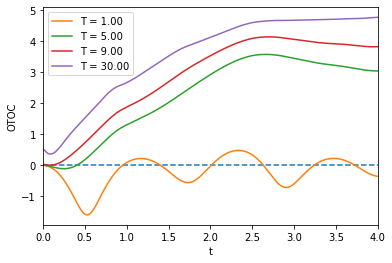

In [72]:
if(True):#Plot Thermal OTOC
    import matplotlib.pyplot as plt
    from matplotlib.ticker import ScalarFormatter
    fig, ax = plt.subplots()
    ax.plot(t,np.zeros_like(C[:,2]), '--')#depends if log or not
    for T in (1,5,9,30):#DW
    #for T in (1,10,40,100): #HO, doesn't matter since all the same
    #for T in (1,20,50,100,200):#PiB
        beta=1/T
        #ax.plot(t,C_T(C,beta=beta,E_n_fk=E_n_DVR), label = "T = %.2f" %T)
        ax.plot(t,np.log(C_T(C,beta=beta,E_n_fk=E_n_DVR)), label = "T = %.2f" %T)
    ax.set_ylabel('OTOC')
    #ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.set_xlabel('t')
    ax.set_xlim([0,4])
    #plt.text( x= 5,y=0.08, s=r'$\beta$')
    ax.legend()
    plt.show()


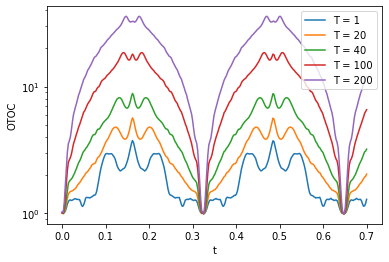

In [627]:
###recycling
if(False):#for 2D integration
    from scipy.integrate import simps
    import numpy as np
    x = np.linspace(0, 1, 20)
    y = np.linspace(0, 1, 30)
    z = np.cos(x[:,None])**4 + np.sin(y)**2
    simps(simps(z, y), x)
if(False):#other plotting
    import matplotlib.pyplot as plt
    from matplotlib.ticker import ScalarFormatter
    for T in (1,20,40,100,200):
        beta=1/T
        plt.plot(t,C_T(C,beta=beta,E_n_fk=E_n_DVR), label = "T = %.0f" %T)
    plt.ylabel('OTOC')
    plt.yscale('log')
    plt.xlabel('t')
    #plt.text( x= 5,y=0.08, s=r'$\beta$')
    plt.legend()
    plt.show()
if(False):
    def kin_ab(grid,a,b,hbar=1,m=1):#factor 9 wrong
        N_grid=len(grid)
        N=N_grid+1
        T = np.zeros((N_grid,N_grid)) 
        for k in range(N_grid):
            for l in range(N_grid):
                if(k==l):
                    T[k,k]= (2* (N)**2 +1)/3 - 1/np.sin(np.pi*(k+1)/N)**2 
                if(k!=l):
                    T[k,l]= (-1)**(k-l) * ( 1 /np.sin(np.pi* (k-l) / (2*N))**2 - 1 /(np.sin(np.pi*(k+l+2)/(2*N))**2))
        T *= 0.5 *np.pi**2 * hbar**2 / (2*m*(b-a)**2)
        return T